### Quest 03: AARRR 분석/통계분석 - 김유진

1. 파일 업로드 및 필요한 라이브러리 다운로드

In [16]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II (2).xlsx


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. 데이터 시트 두개 연결 작업 및 전처리를 위한 데이터 확인

In [18]:
all_sheets = pd.read_excel('online_retail_II.xlsx', sheet_name=None)

In [19]:
print(all_sheets.keys())

dict_keys(['Year 2009-2010', 'Year 2010-2011'])


In [20]:
df_0910 = all_sheets['Year 2009-2010']
df_1011 = all_sheets['Year 2010-2011']

In [21]:
df_0910.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [22]:
df_1011.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
data = pd.concat([df_0910, df_1011], ignore_index=True)

### **문제 1: 데이터 로드 및 탐색**

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [24]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [25]:
data.describe()
#quantity 음수
#invocice data 조정
#price 음수

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


<Axes: >

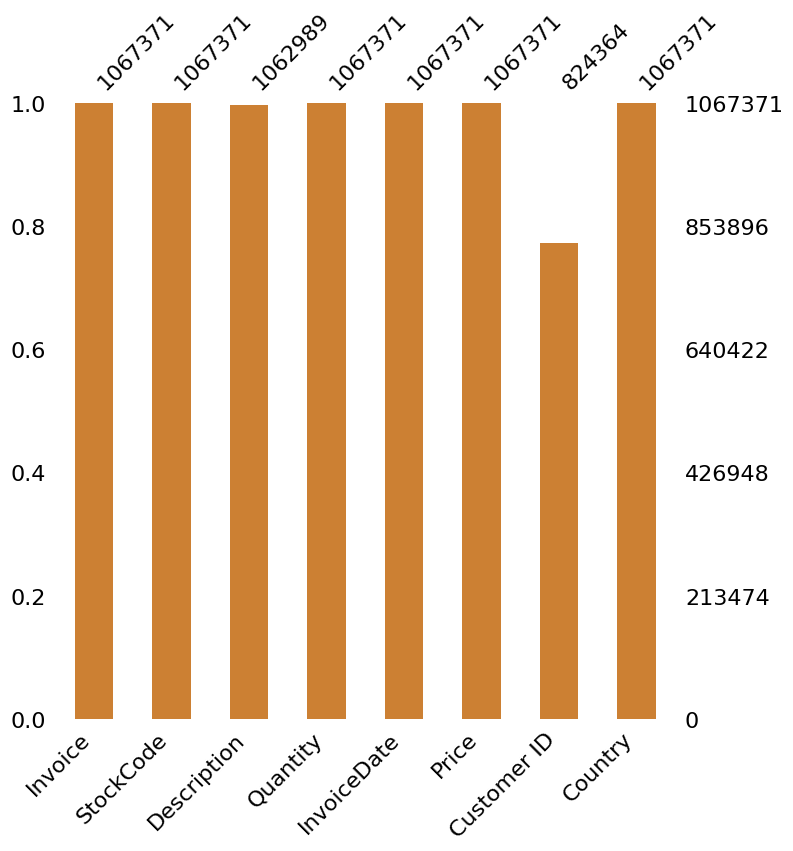

In [27]:
import missingno as msno
msno.bar(data, figsize=(8, 8), color=(0.8, 0.5, 0.2))
#null 제거

In [28]:
data[data.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [29]:
data2 = data.copy()

### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [30]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(data['InvoiceDate'].dtype)

datetime64[ns]


In [31]:
data.isna().mean()

,0
Invoice,0.000000
StockCode,0.000000
Description,0.004105
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,0.227669
Country,0.000000


In [32]:
data = data.dropna(subset=['Customer ID'])
data['Customer ID'].isna().sum()

np.int64(0)

In [33]:
data['Customer ID'] = data['Customer ID'].astype(int)

<ipython-input-33-cd8e7da894e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Customer ID'] = data['Customer ID'].astype(int)


In [34]:
data = data.sort_values('InvoiceDate')


In [35]:
data['Total'] = data['Quantity'] * data['Price']

In [36]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

In [37]:
data['Country'].unique()


array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [38]:
data['Customer ID'].unique()

array([13085, 13078, 15362, ..., 15520, 13298, 12713])

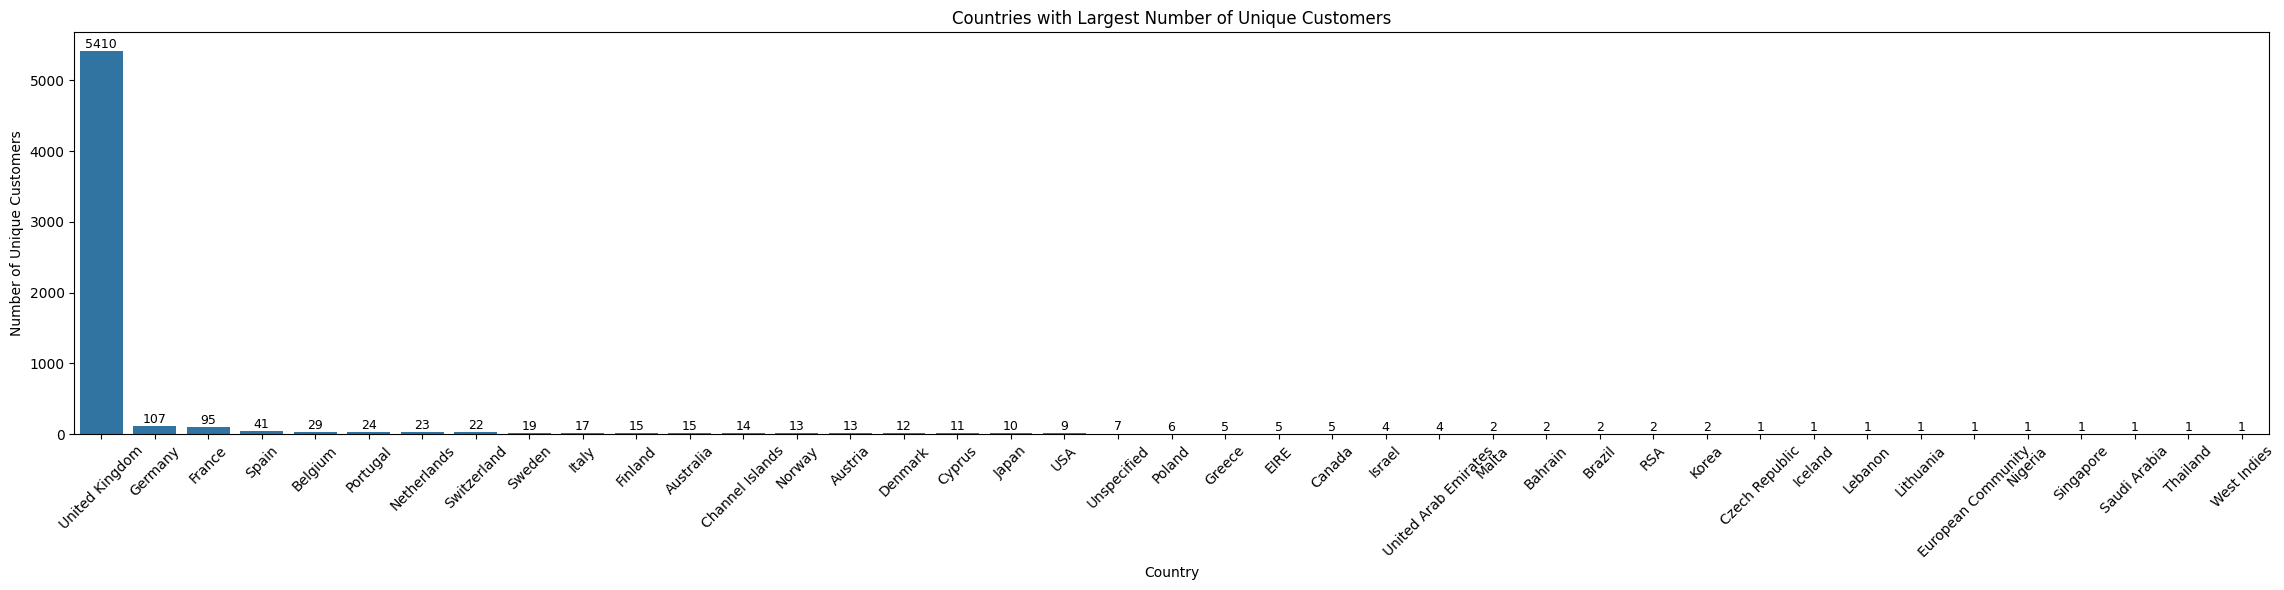

In [39]:
# Country별로 유니크한 Customer ID 수 계산
customer_unique_counts = data.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(23, 6))
ax = sns.barplot(x=customer_unique_counts.index, y=customer_unique_counts.values)  # <- 여기서 ax 정의
plt.title('Countries with Largest Number of Unique Customers')
plt.xlabel('Country')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)

# 막대 위에 숫자 라벨 추가
for i, value in enumerate(customer_unique_counts.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.
- 예시결과

In [40]:
data['InvoiceDate'].dt.to_period('M')

,InvoiceDate
0,2009-12
1,2009-12
2,2009-12
3,2009-12
4,2009-12
...,...
1067357,2011-12
1067356,2011-12
1067369,2011-12
1067361,2011-12


In [41]:
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')
monthly_unique_customers = data.groupby('InvoiceMonth')['Customer ID'].nunique().sort_values(ascending=False)
print(monthly_unique_customers)

InvoiceMonth
2011-11    1711
2010-11    1683
2010-10    1577
2011-10    1425
2011-09    1302
2010-09    1202
2010-03    1111
2010-06    1095
2011-05    1079
2010-05    1062
2011-06    1051
2009-12    1045
2011-03    1020
2010-04     998
2011-07     993
2010-07     988
2011-08     980
2010-08     964
2010-12     948
2011-04     899
2010-02     807
2011-02     798
2010-01     786
2011-01     783
2011-12     686
Freq: M, Name: Customer ID, dtype: int64


In [42]:
# 3. 각 Customer ID별로 첫 구매 날짜 찾기
first_purchase = data.groupby('Customer ID')['InvoiceDate'].min()

# 4. 첫 구매 날짜를 월 단위로 변환
first_purchase_month = first_purchase.dt.to_period('M')

# 5. 월별 신규 고객 수 세기
new_customers_per_month = first_purchase_month.value_counts().sort_index()

# 결과 출력
print(new_customers_per_month)

InvoiceDate
2009-12    1045
2010-01     394
2010-02     363
2010-03     436
2010-04     291
2010-05     254
2010-06     269
2010-07     183
2010-08     158
2010-09     242
2010-10     379
2010-11     322
2010-12      77
2011-01      71
2011-02     123
2011-03     178
2011-04     105
2011-05     108
2011-06     108
2011-07     102
2011-08     106
2011-09     187
2011-10     221
2011-11     192
2011-12      28
Freq: M, Name: count, dtype: int64


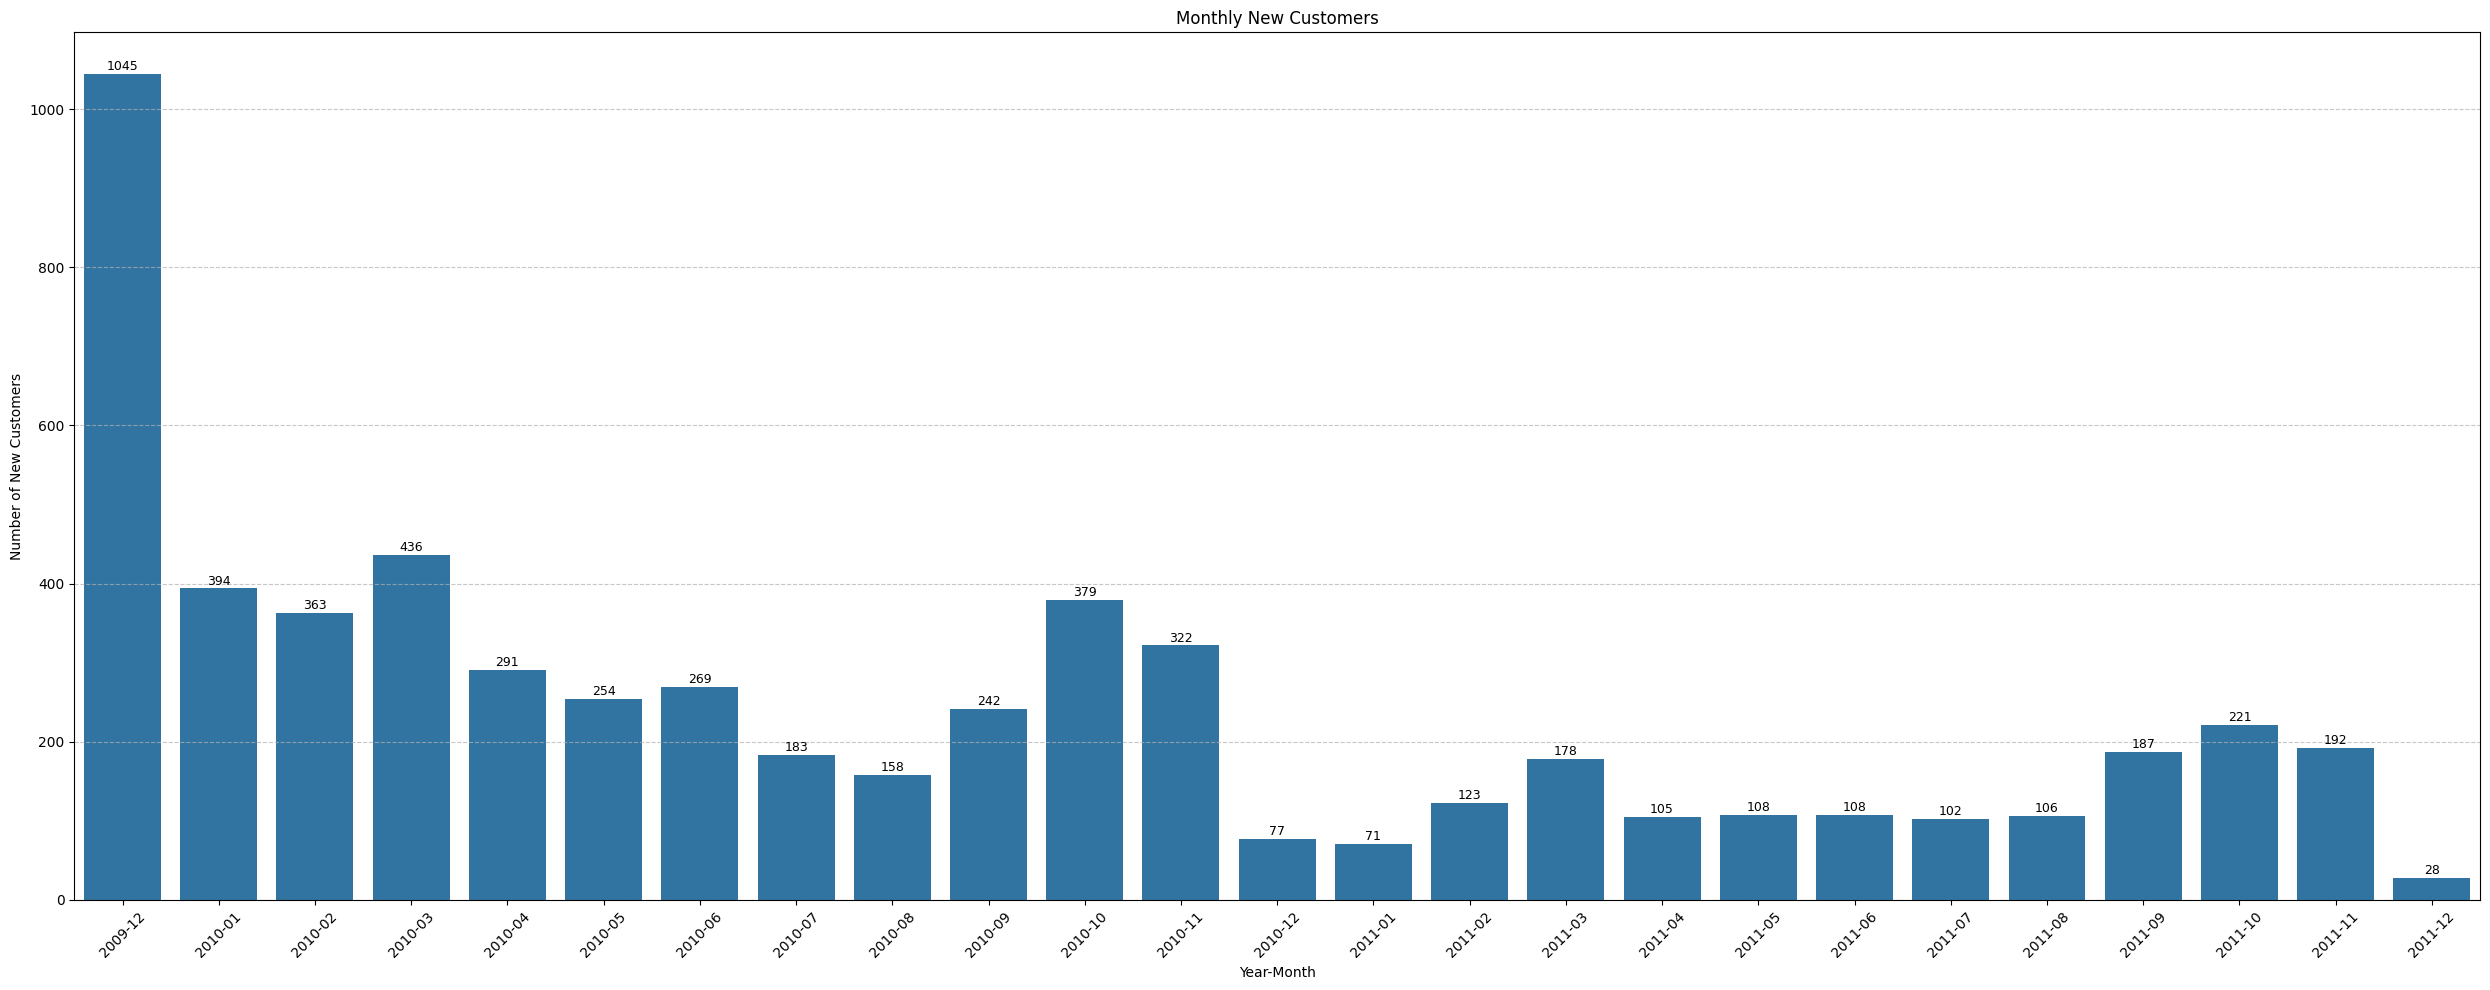

In [43]:
new_customers_per_month = first_purchase_month.value_counts().sort_index()

# 시각화
plt.figure(figsize=(25, 10))
ax = sns.barplot(x=new_customers_per_month.index, y=new_customers_per_month.values)  # <- 여기서 ax 정의
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# 막대 위에 숫자 라벨 추가
for i, value in enumerate(new_customers_per_month.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [44]:
# 첫 구매 이후 총 구매 금액이 50 파운드 이상인 고객 = 활성화된 고객
data.groupby('Customer ID')['Price'].sum() > 50

,Price
Customer ID,
12346,True
12347,True
12348,True
12349,True
12350,True
...,...
18283,True
18284,True
18285,True


In [46]:
# 1. InvoiceDate를 datetime으로 변환 (혹시 안 되어 있으면)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 2. 고객별로 첫 구매 날짜 찾기
first_purchase_date = data.groupby('Customer ID')['InvoiceDate'].min()

# 3. 첫 구매 날짜에 해당하는 데이터만 추출
first_purchases = data.merge(first_purchase_date, on='Customer ID', suffixes=('', '_First'))

# 4. 첫 구매 날짜에 해당하는 구매만 필터링
first_purchases = first_purchases[first_purchases['InvoiceDate'] == first_purchases['InvoiceDate_First']]

# 5. 고객별 첫 구매 금액 합산
first_purchase_amount = first_purchases.groupby('Customer ID')['Price'].sum()

# 6. 첫 구매 금액이 정확히 50인 고객 찾기
first_purchase_exact_50 = first_purchase_amount[first_purchase_amount == 50]

# 7. 결과 출력
print(f"첫 구매 금액이 정확히 50인 고객 수: {first_purchase_exact_50.count()}")
print(first_purchase_exact_50)


첫 구매 금액이 정확히 50인 고객 수: 3
Customer ID
14228    50.0
14773    50.0
17014    50.0
Name: Price, dtype: float64


In [47]:
# 1. Customer별 총 구매금액
customer_total_purchase = data.groupby('Customer ID')['Price'].sum()

# 2. 총 구매금액이 50 이상인 고객만 활성화
activated_customers = customer_total_purchase[customer_total_purchase >= 50]

# 3. 전체 고객 수
total_customers = customer_total_purchase.shape[0]

# 4. 활성화된 고객 수
activated_customers_count = activated_customers.shape[0] - len(first_purchase_exact_50)

# 5. 활성화율
activation_rate = activated_customers_count / total_customers

# 6. 출력
print(f"전체 고객 수: {total_customers}")
print(f"활성화된 고객 수 (첫 구매 후 50GBP 이상 지출한 고객): {activated_customers_count - len(first_purchase_exact_50)}")
print(f"활성화율: {activation_rate:.2%}")

전체 고객 수: 5942
활성화된 고객 수 (첫 구매 후 50GBP 이상 지출한 고객): 4777
활성화율: 80.44%


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       824364 non-null  object        
 1   StockCode     824364 non-null  object        
 2   Description   824364 non-null  object        
 3   Quantity      824364 non-null  int64         
 4   InvoiceDate   824364 non-null  datetime64[ns]
 5   Price         824364 non-null  float64       
 6   Customer ID   824364 non-null  int64         
 7   Country       824364 non-null  object        
 8   Total         824364 non-null  float64       
 9   InvoiceMonth  824364 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(2), object(4), period[M](1)
memory usage: 69.2+ MB


In [49]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID,Total
count,824364.000000,824364,824364.000000,824364.000000,824364.000000
mean,12.414574,2011-01-01 22:29:28.042054144,3.676800,15324.638504,20.195317
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2010-07-06 11:58:00,1.250000,13975.000000,4.250000
50%,5.000000,2010-12-03 14:26:00,1.950000,15255.000000,11.250000
75%,12.000000,2011-07-27 15:14:00,3.750000,16797.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,188.976099,NaN,70.241388,1697.464450,308.685001


In [50]:
# 1. InvoiceDate를 datetime으로 변환
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['current_month'] = pd.to_datetime(data['InvoiceDate']).dt.year.map(str) + "-" + pd.to_datetime(data['InvoiceDate']).dt.month.map(str) + "-01"
data['current_month'] = pd.to_datetime(data['current_month']).dt.date
data['cohort_month'] = data.groupby('Customer ID')['current_month'].transform('min')

In [51]:
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceMonth,current_month,cohort_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009-12-01,2009-12-01


In [52]:
# 현재년도와 월에서 코호트 년월을 빼서 corhort_index를 생성
# corhort_index: 코호트 시작일로부터 얼만큼 지났는지에 대한 가로축을 만들기 위한 기준

def months_diff(data, col1, col2):
    current_month = pd.to_datetime(data[col1]).dt.month
    cohort_month = pd.to_datetime(data[col2]).dt.month
    return current_month - cohort_month

data['months_diff'] = months_diff(data, 'current_month', 'cohort_month')

def years_diff(data, col1, col2):
    current_year = pd.to_datetime(data[col1]).dt.year
    cohort_year = pd.to_datetime(data[col2]).dt.year
    return current_year - cohort_year

data['years_diff'] = years_diff(data, 'current_month', 'cohort_month')

def cohort_index(data, col1, col2):
    return data[col1] * 12 + data[col2]

data['cohort_index'] = cohort_index(data, 'years_diff', 'months_diff')

data.head(3)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceMonth,current_month,cohort_month,months_diff,years_diff,cohort_index
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12,2009-12-01,2009-12-01,0,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009-12-01,2009-12-01,0,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009-12-01,2009-12-01,0,0,0


In [53]:
# 1. InvoiceDate를 datetime으로 변환
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 2. current_month를 기준으로 current_quarter 생성
data['current_quarter'] = pd.to_datetime(data['InvoiceDate']).dt.to_period('Q').astype(str)

# 3. cohort_month를 기준으로 cohort_quarter 생성
data['cohort_month'] = pd.to_datetime(data['cohort_month'])
data['cohort_quarter'] = data['cohort_month'].dt.to_period('Q').astype(str)

data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceMonth,current_month,cohort_month,months_diff,years_diff,cohort_index,current_quarter,cohort_quarter
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12,2011-12-01,2011-08-01,4,0,4,2011Q4,2011Q3
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12,2011-12-01,2011-08-01,4,0,4,2011Q4,2011Q3
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12,2011-12-01,2011-08-01,4,0,4,2011Q4,2011Q3
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12,2011-12-01,2011-08-01,4,0,4,2011Q4,2011Q3
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.00,2011-12,2011-12-01,2011-08-01,4,0,4,2011Q4,2011Q3


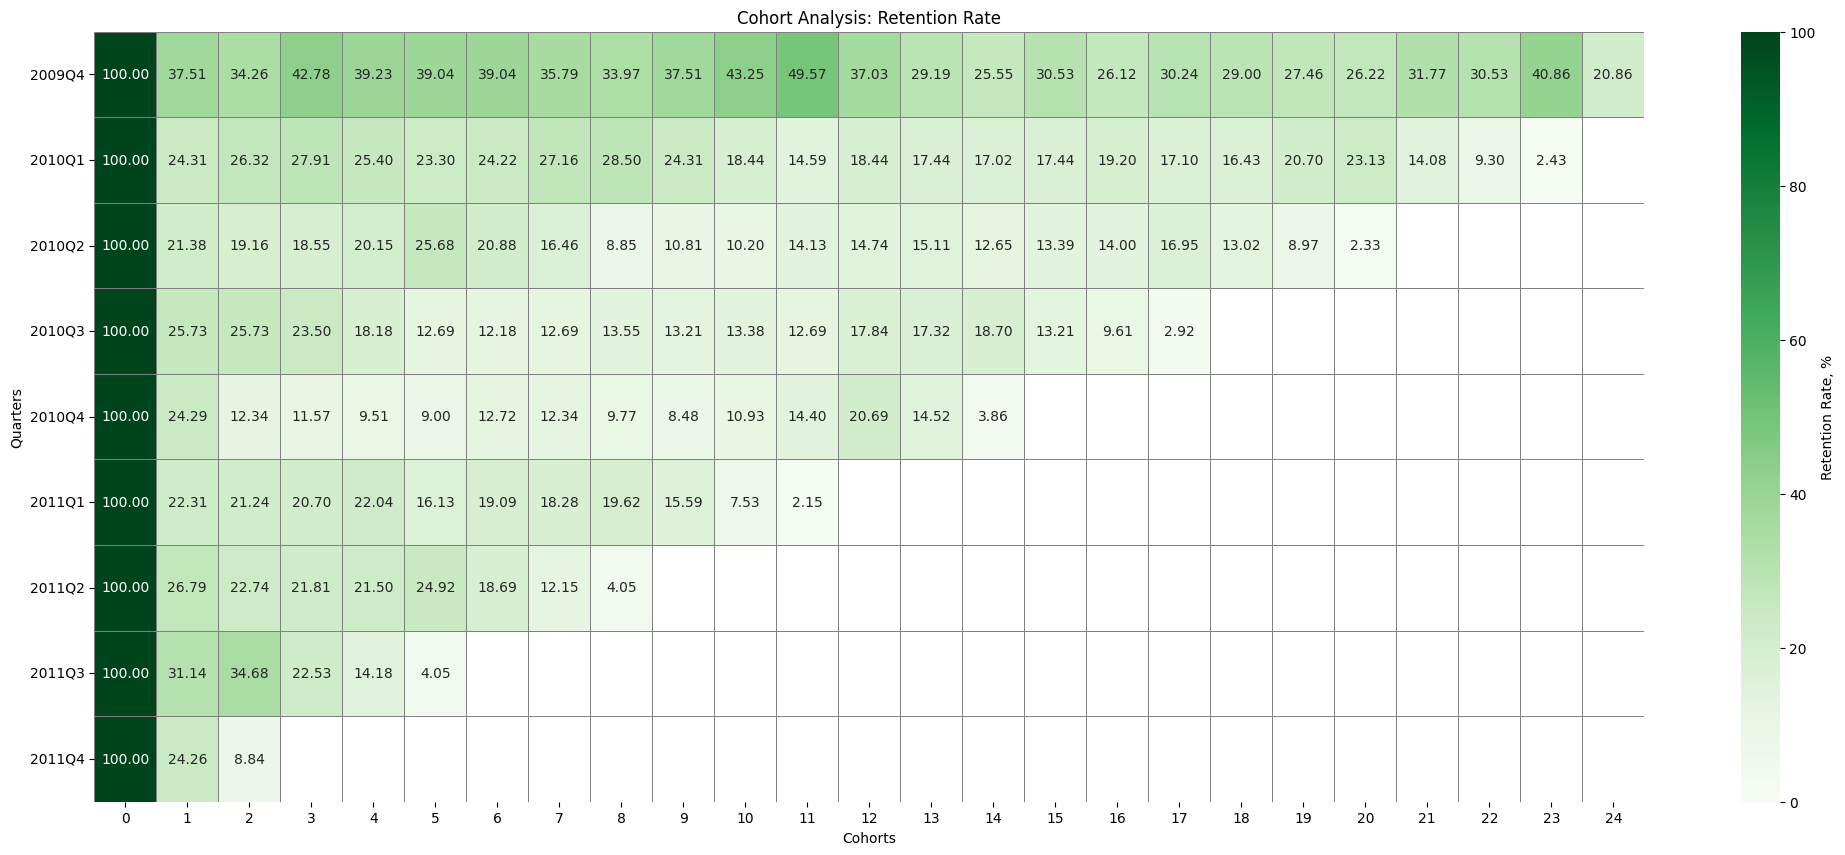

In [56]:
# 1. InvoiceDate를 datetime으로 변환
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 2. current_month 생성
data['current_month'] = data['InvoiceDate'].dt.year.map(str) + "-" + data['InvoiceDate'].dt.month.map(str) + "-01"
data['current_month'] = pd.to_datetime(data['current_month']).dt.date

# 3. cohort_month 계산
data['cohort_month'] = data.groupby('Customer ID')['current_month'].transform('min')

# 4. 연도/월 차이로 cohort_index 계산
def months_diff(data, col1, col2):
    current_month = pd.to_datetime(data[col1]).dt.month
    cohort_month = pd.to_datetime(data[col2]).dt.month
    return current_month - cohort_month

def years_diff(data, col1, col2):
    current_year = pd.to_datetime(data[col1]).dt.year
    cohort_year = pd.to_datetime(data[col2]).dt.year
    return current_year - cohort_year

def cohort_index(data, col1, col2):
    return data[col1] * 12 + data[col2]

data['months_diff'] = months_diff(data, 'current_month', 'cohort_month')
data['years_diff'] = years_diff(data, 'current_month', 'cohort_month')
data['cohort_index'] = cohort_index(data, 'years_diff', 'months_diff')

# 5. 쿼터 기반 컬럼 생성
data['current_quarter'] = data['InvoiceDate'].dt.to_period('Q').astype(str)
data['cohort_month'] = pd.to_datetime(data['cohort_month'])  # format 보장
data['cohort_quarter'] = data['cohort_month'].dt.to_period('Q').astype(str)

# 6. cohort_quarter와 cohort_index별 고객 수 집계
cohort_counts = data.groupby(['cohort_quarter', 'cohort_index'])['Customer ID'].nunique()

# 7. 데이터프레임 변환 및 정리
cohort_counts_data = cohort_counts.to_frame().rename(columns={'Customer ID': 'Cohorts'}).reset_index()

# 8. 리텐션율 계산
cohort_counts_data['retention_rate'] = cohort_counts_data['Cohorts'] / cohort_counts_data.groupby("cohort_quarter")["Cohorts"].transform("max")

# 9. 피벗 테이블 생성
cohorts_pivot = cohort_counts_data.pivot_table(
    index='cohort_quarter',
    columns='cohort_index',
    values='retention_rate'
)

# 10. 히트맵 시각화 (예시처럼 퍼센트로)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 10))
sns.heatmap(
    data=cohorts_pivot * 100,
    annot=True,
    fmt='.2f',
    cmap='Greens',
    cbar_kws={'label': 'Retention Rate, %'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0,
    vmax=100
)
plt.title('Cohort Analysis: Retention Rate')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.yticks(rotation=0)
plt.show()


### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

In [57]:
# 2. current_month 생성
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['current_month'] = data['InvoiceDate'].dt.year.map(str) + "-" + data['InvoiceDate'].dt.month.map(str) + "-01"
data['current_month'] = pd.to_datetime(data['current_month']).dt.date

# 3. cohort_month 계산 (CustomerID 기준)
data['cohort_month'] = data.groupby('CustomerID')['current_month'].transform('min')

# 4. 연도/월 차이로 cohort_index 계산
def months_diff(data, col1, col2):
    current_month = pd.to_datetime(data[col1]).dt.month
    cohort_month = pd.to_datetime(data[col2]).dt.month
    return current_month - cohort_month

def years_diff(data, col1, col2):
    current_year = pd.to_datetime(data[col1]).dt.year
    cohort_year = pd.to_datetime(data[col2]).dt.year
    return current_year - cohort_year

def cohort_index(data, col1, col2):
    return data[col1] * 12 + data[col2]

data['months_diff'] = months_diff(data, 'current_month', 'cohort_month')
data['years_diff'] = years_diff(data, 'current_month', 'cohort_month')
data['cohort_index'] = cohort_index(data, 'years_diff', 'months_diff')

# 5. 쿼터 기반 컬럼 생성
data['cohort_month'] = pd.to_datetime(data['cohort_month'])
data['current_quarter'] = data['InvoiceDate'].dt.to_period('Q').astype(str)
data['cohort_quarter'] = data['cohort_month'].dt.to_period('Q').astype(str)

# 6. cohort_quarter와 cohort_index별 평균 구매량 집계
cohort_quantity = data.groupby(['cohort_quarter', 'cohort_index'])['Quantity'].mean()

# 7. 데이터프레임 변환 및 정리
cohort_quantity_data = cohort_quantity.to_frame().rename(columns={'Quantity': 'Avg_Quantity'}).reset_index()

# 8. 피벗 테이블 생성
cohorts_pivot2 = cohort_quantity_data.pivot_table(
    index='cohort_quarter',
    columns='cohort_index',
    values='Avg_Quantity'
)

# 9. heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(
    data=cohorts_pivot2,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)
plt.title('Average Quantity by Cohort Quarter')
plt.ylabel('Cohort Quarter')
plt.xlabel('Cohort Index (Months)')
plt.show()


KeyError: 'CustomerID'

### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

In [ ]:
#시각화코드
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [ ]:
# 데이터 전처리
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# TotalPrice 계산 (총 매출)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 고객별 분석을 위한 데이터 준비
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',        # 구매 횟수
    'TotalPrice': 'sum',           # 총 지출 금액
    'InvoiceDate': ['min', 'max']  # 첫 구매일과 마지막 구매일
}).reset_index()

customer_data.columns = ['CustomerID', 'PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']

# Customer Lifetime (일 단위)
customer_data['CustomerLifetime'] = (customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days

# 구매 빈도
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['PurchaseFrequency']

# CLV 계산
customer_data['CLV'] = customer_data['AverageOrderValue'] * customer_data['PurchaseFrequency'] * (customer_data['CustomerLifetime'] / 365)

# CLV 상위 10명의 고객 출력
print("CLV 상위 10명의 고객")
print(customer_data[['CustomerID', 'CLV']].sort_values(by='CLV', ascending=False).head(10))

# 전체 평균 CLV 계산
average_clv = customer_data['CLV'].mean()
print(f"\n전체 고객의 평균 CLV: {average_clv:.2f}")

In [ ]:
#시각화코드
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 기초통계문제
문제 10 ~ 13: 기본 통계분포 함수를 이용하여 문제를 풀어보세요.


### 문제10

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [ ]:
# 문제 팁
# print(f"평균 대기시간: {mean_waiting_time:.2f}")
# print(f"표준편차: {std_waiting_time:.2f}")
# '''
# 평균 대기시간: 9.78
# 표준편차: 2.90
# '''

import numpy as np
import matplotlib.pyplot as plt

waiting_times = []

for _ in range(100):
    time = np.random.uniform(5, 15)  # 5 이상 15 이하의 연속적인 수
    waiting_times.append(time)

mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times)


print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

### 문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [ ]:
from scipy.stats import bernoulli

# 성공 확률과 시행수 정의
p = 0.3
n = 10

outcomes = bernoulli.rvs(p, size=n)
success_count = outcomes.sum()

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

### 문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [ ]:
from scipy.stats import binom

num_of_stds = 20
num_of_quizzes = 5
percent = 0.7

scores = binom.rvs(num_of_quizzes, p = percent, size=num_of_stds, random_state=0)
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

### 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규 분포 파라미터: 평균, 표준편차, 데이터 샘플 수
mu = 50
sigma = 5
num_of_samples = 1000

# 샘플 생성
weights = norm.rvs(loc=mu, scale=sigma, size=num_of_samples, random_state=0)

# 히스토그램 그리기
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

In [ ]:
print(f"45g 이상 55g 이하 비율: {within_range:.2%}")
